### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [65]:
data = pd.read_csv('data/coupons.csv')

In [66]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

There are a few apparent problems with this dataset. For starters, the spelling of the column passanger is incorrect. Next, there there is a problem with the cars column in the dataset. To verify, I will check manually for null data.

In [68]:
no_val = data.isnull().any(axis=1).sum()
print(no_val)

12576


This shows further investigation is required. I will check missing data by the columns next.

In [69]:
column_missing = data.isnull().sum()
print(column_missing)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


Clearly it has been verified that a large number of values for the car are missing. With the number of missing values it has compared to the rest, it should be removed from the dataset. The null values in the other columns shouldn't have an impact due to the small number of data missing.

3. Decide what to do about your missing data -- drop, replace, other...

With the amount of missing data in the car column, it should simply be removed. The passangar column will be renamed to passenger.

In [70]:
#Dropping the cars column and renaming the passanger column to passenger
print(f"The original shape of the data is: {data.shape}")
data = data.drop(columns=['car'])
data = data.rename(columns={'passanger': 'passenger'})
print(f"The new shape of the data is:  {data.shape}")

The original shape of the data is: (12684, 26)
The new shape of the data is:  (12684, 25)


In [71]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

The column has been renamed and the cars row has been dropped.

4. What proportion of the total observations chose to accept the coupon?



In [72]:
#Since Y is either 0 or 1, sum will account for all the accepted responses
accepted= data['Y'].sum()
count = data['Y'].count()
prop = accepted/count
print(prop)

0.5684326710816777


The total proportion who chose to accept the coupon is 57%.

5. Use a bar plot to visualize the `coupon` column.

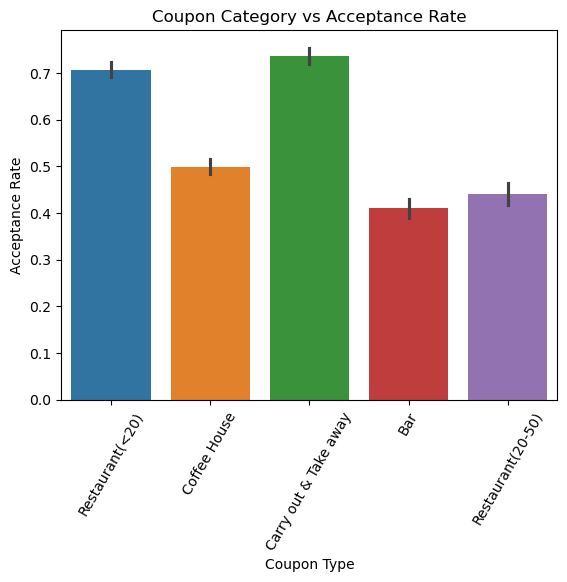

In [73]:
sns.color_palette("tab10")
sns.barplot(data, x='coupon', y='Y', hue='coupon',legend=False)
plt.title("Coupon Category vs Acceptance Rate")
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=60)
plt.xlabel("Coupon Type")
plt.show()


6. Use a histogram to visualize the temperature column.

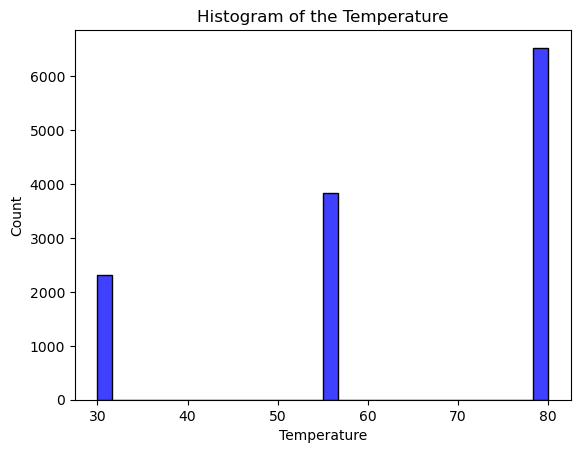

In [74]:
sns.histplot(data['temperature'], kde=False, color='blue', bins=30)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title('Histogram of the Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
bar_dataframe = data.query('coupon== "Bar" ')

2. What proportion of bar coupons were accepted?


In [76]:
#Proportion of accepted is ratio between accepted and total
accepted = bar_dataframe['Y'].sum()
total = bar_dataframe['Y'].count()
prop = accepted/total
print(f"{prop} were the proportion who accepted the coupon")

0.41001487357461575 were the proportion who accepted the coupon


The proportion of bar coupons that were accepted is 41%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [77]:
#Getting Unique values of bar visits for the query
print(f"age: {bar_dataframe['Bar'].dropna().unique()}")

age: ['never' 'less1' '1~3' 'gt8' '4~8']


In [78]:
#People went to a bar 3 or fewer times a month
#Never and less1 represent values that were 3 or fewer
bar_l3 = bar_dataframe.query('Bar in ["never", "less1", "1~3"]')
bar_l3_a = bar_l3['Y'].sum()
bar_l3_t = bar_l3['Y'].count()
barl3_prop = bar_l3_a/bar_l3_t

#People who went to the bar for or more times
bar_g4 = bar_dataframe.query('Bar in ["4~8", "gt8"]')
bar_g4_a = bar_g4['Y'].sum()
bar_g4_t = bar_g4['Y'].count()
bar_g4_prop = bar_g4_a/bar_g4_t

#Acceptance Rates
print(f"Acceptance rate for 3 or fewer bar visits, {barl3_prop} ")
print(f"Acceptance rate for more than 3 bar visits, {bar_g4_prop} ")




Acceptance rate for 3 or fewer bar visits, 0.37061769616026713 
Acceptance rate for more than 3 bar visits, 0.7688442211055276 


The acceptance rate of the people who went to the bar more than 3 times was ~76%, while only ~37% of those who went to the bar 3 or fewer times accepted

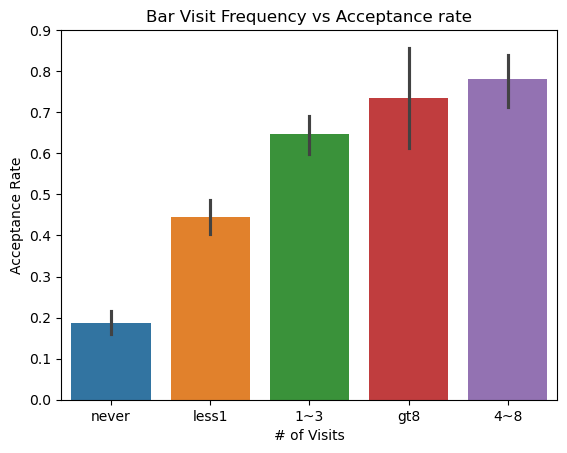

In [79]:
sns.color_palette("tab10")
sns.barplot(data=bar_dataframe, x='Bar', y='Y', hue='Bar', legend=False)
plt.title("Bar Visit Frequency vs Acceptance rate")
plt.xlabel("# of Visits")
plt.ylabel("Acceptance Rate")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [80]:
#Drivers who go to a bar more than once a month and are over the age of 25 
g1_visit_and_g25 = bar_dataframe.query('Bar in ["4~8", "gt8", "1~3"] and age not in ["below21", "21"]')
g1_visit_and_g25_accept = g1_visit_and_g25['Y'].sum()
g1_visit_and_g25_total =  g1_visit_and_g25['Y'].count()
g1_visit_and_g25_acceptance_rate = g1_visit_and_g25_accept/g1_visit_and_g25_total

#Everyone Else
bar_others = bar_dataframe.query('not (Bar in ["4~8", "gt8", "1~3"] and age not in ["below21", "21"])')
bar_others_accept = bar_others['Y'].sum()
bar_others_total =  bar_others['Y'].count()
bar_others_acceptance_rate = bar_others_accept/bar_others_total

#Acceptance Rates
print(f"The acceptance rate of the group is {g1_visit_and_g25_acceptance_rate}")
print(f"The acceptance rate of everyone else is {bar_others_acceptance_rate}")


The acceptance rate of the group is 0.6952380952380952
The acceptance rate of everyone else is 0.33500313087038197


The acceptance rate of the bar coupon for drivers who are older than 25 is 69.5%, and the acceptance rate for everyone else not in the group is 33.5%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [81]:
#Drivers who go to bars more than once a month and had passengers that were not a kid and had 
#occupations other than farming, fishing, or forestry.

fullquery = 'Bar  in ["4~8", "gt8", "1~3"] and passenger != "Kid(s)" and occupation not in ["Farming", "Fishing", "Forestry"]'
driver_g1m_notkid_nfff = bar_dataframe.query(fullquery)
driver_g1m_notkid_nfff_accept = driver_g1m_notkid_nfff['Y'].sum()
driver_g1m_notkid_nfff_total = driver_g1m_notkid_nfff['Y'].count()
driver_g1m_notkid_nfff_acceptance_rate = driver_g1m_notkid_nfff_accept / driver_g1m_notkid_nfff_total

#Everyone else
bar_nothers = bar_dataframe.query('not ' + fullquery)
bar_nothers_accept = bar_nothers['Y'].sum()
bar_nothers_total =  bar_nothers['Y'].count()
bar_nothers_acceptance_rate = bar_nothers_accept  / bar_nothers_total

#Acceptance Rates
print(f"The acceptance rate of the group is {driver_g1m_notkid_nfff_acceptance_rate}")
print(f"The acceptance rate of everyone else is {bar_nothers_acceptance_rate}")


The acceptance rate of the group is 0.7132486388384754
The acceptance rate of everyone else is 0.3103174603174603


The acceptance rate of acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 71%
The acceptance rate of everyone else not in the group is 30%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [82]:
#Getting Unique values of columns for data query
print(f"maritalStatus: {bar_dataframe['maritalStatus'].unique()}")
print(f"income: {bar_dataframe['income'].unique()}")
print(f"rlt20: {bar_dataframe['RestaurantLessThan20'].dropna().unique()}")

maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
income: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
rlt20: ['4~8' '1~3' 'less1' 'gt8' 'never']


In [83]:
#Go to bars more than once a month, had passengers that were not a kid, and were not widowed 
group1_query = 'Bar  in ["4~8", "gt8", "1~3"] and passenger != "Kid(s)" and maritalStatus != "Widowed"'
group1 = bar_dataframe.query(group1_query)
group1_accept = group1['Y'].sum()
group1_total = group1['Y'].count()
group1_acceptance_rate = group1_accept/group1_total

#Go to bars more than once a month and are under the age of 30
group2_query = 'Bar  in ["4~8", "gt8", "1~3"] and age not in ["21", "below21", "26"]'
group2 = bar_dataframe.query(group2_query)
group2_accept = group2['Y'].sum()
group2_total = group2['Y'].count()
group2_acceptance_rate = group2_accept/group2_total

#Go to cheap restaurants more than 4 times a month and income is less than 50K.
group3_query = 'RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]'
group3 = bar_dataframe.query(group3_query)
group3_accept = group3['Y'].sum()
group3_total = group3['Y'].count()
group3_acceptance_rate = group3_accept/group3_total

#Acceptance Rates:
print(f"Group 1: {group1_acceptance_rate}")
print(f"Group 2: {group2_acceptance_rate}")
print(f"Group 3: {group3_acceptance_rate}")

Group 1: 0.7132486388384754
Group 2: 0.6414342629482072
Group 3: 0.45348837209302323


The acceptance rate of people who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71%, the acceptance rate of people who go to bars more than once a month and are under the age of 30 is 64%, and the acceptance rate of people who go to cheap restaurants more than 4 times a month with an income that is less than 50K is 45%.

# ** ANSWER HERE ** 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

There are a few things that can hypothesized about drivers who accept bar coupons. The more drivers visit bars, the more likely they are to accept the coupon, perhaps due to the fact that they are more likely to use it. Furthermore, people who visit cheaper restaurants are more likely Additionally, younger people are more likely to accept a coupon to the bar, indicating that they may want to use the bar more.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [84]:
#Coupon Groups
print(data['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


I will look at groups who chose the Coffeehouse coupon.

In [85]:
coffee_dataframe = data.query('coupon== "Coffee House" ')
print(coffee_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passenger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null   obje

In [86]:
#Go through all columns compare their acceptance rates to find significance
for column in coffee_dataframe.columns:
    isSig = False 
    if column != 'CoffeeHouse' and column != 'Y':
        frame = coffee_dataframe.groupby(column)['Y'].mean()
    for group, mean in frame.items():
        if mean >= .6:
            if not isSig:
                print("Group " + column)
                isSig = True
            print(f"{group},  Acceptance Rate: {mean}")


Group time
10AM,  Acceptance Rate: 0.6407119021134594
Group age
below21,  Acceptance Rate: 0.6967741935483871
Group education
Some High School,  Acceptance Rate: 0.6071428571428571
Group occupation
Building & Grounds Cleaning & Maintenance,  Acceptance Rate: 0.7272727272727273
Healthcare Practitioners & Technical,  Acceptance Rate: 0.7432432432432432
Healthcare Support,  Acceptance Rate: 0.6153846153846154
Student,  Acceptance Rate: 0.625250501002004
Transportation & Material Moving,  Acceptance Rate: 0.618421052631579
Group Restaurant20To50
gt8,  Acceptance Rate: 0.6373626373626373


Based on the initial exploration, there are 5 Columns where there is significant uptrend in certain categories that accept the coupon:
time, age, education, occupation, and Restaurant20to50.

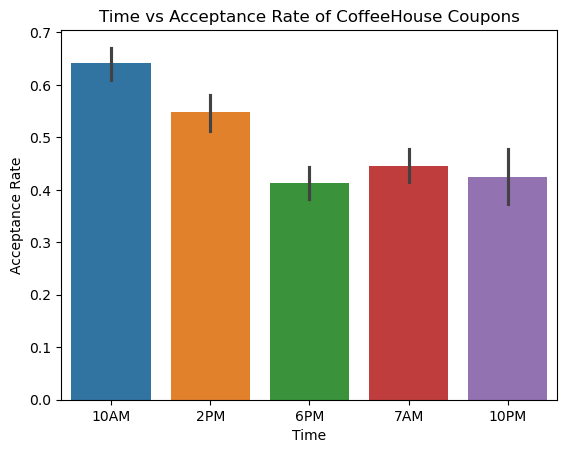

In [87]:
#Time Analysis
sns.set_palette("tab10")
sns.barplot(coffee_dataframe, x='time', y='Y', hue='time', legend=False)
plt.title("Time vs Acceptance Rate of CoffeeHouse Coupons")
plt.xlabel("Time")
plt.ylabel("Acceptance Rate")
plt.show()

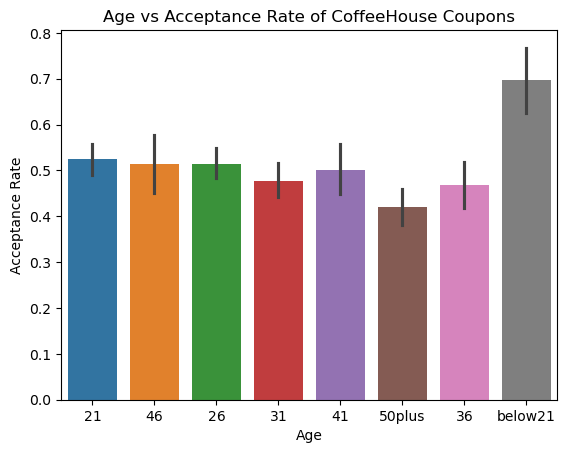

In [88]:
#Age Analysis
sns.set_palette("tab10")
sns.barplot(coffee_dataframe, x='age', y='Y', hue='age', legend=False)
plt.title("Age vs Acceptance Rate of CoffeeHouse Coupons")
plt.xlabel("Age")
plt.ylabel("Acceptance Rate")
plt.show()

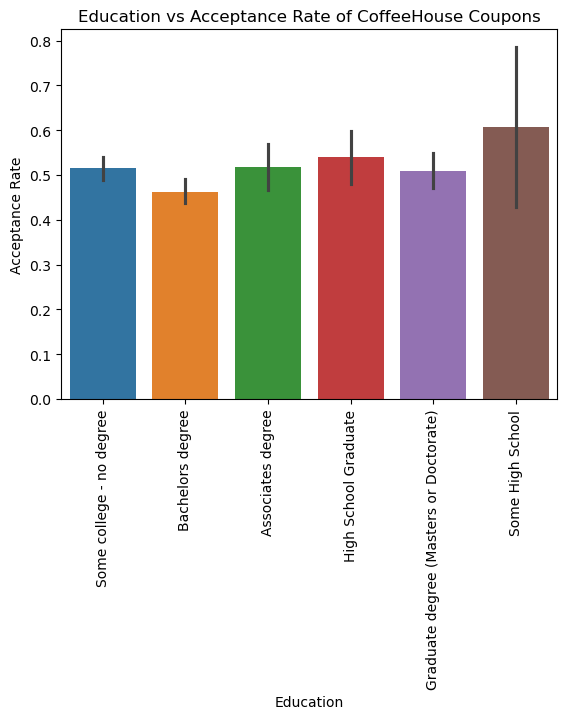

In [89]:
#Education Analysis
sns.set_palette("tab10")
sns.barplot(coffee_dataframe, x='education', y='Y', hue='education',legend=False)
plt.xticks(rotation=90)
plt.title("Education vs Acceptance Rate of CoffeeHouse Coupons")
plt.xlabel("Education")
plt.ylabel("Acceptance Rate")
plt.show()


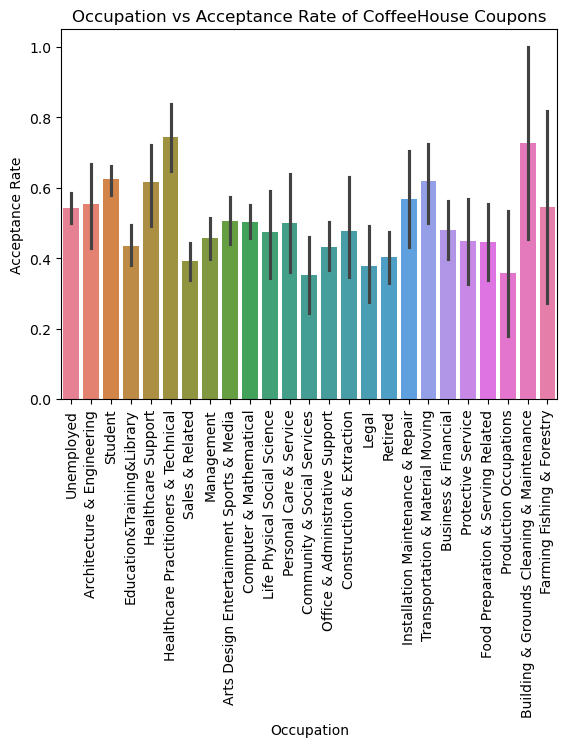

In [90]:
#Occupation Analysis
sns.set_palette("tab10")
sns.barplot(coffee_dataframe, x='occupation', y='Y', hue='occupation', legend=False)
plt.title("Occupation vs Acceptance Rate of CoffeeHouse Coupons")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.ylabel("Acceptance Rate")
plt.show()

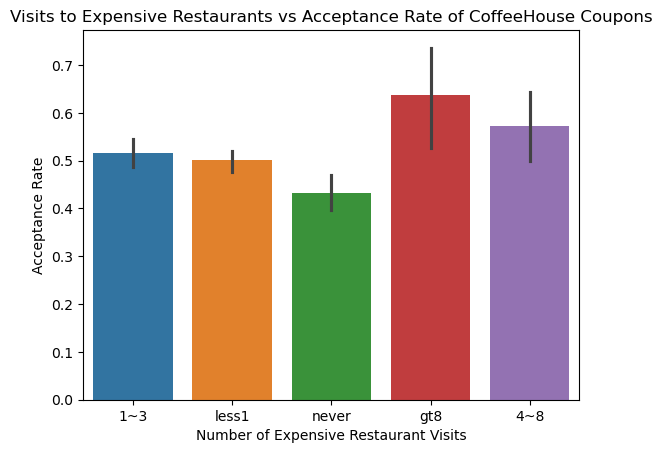

In [91]:
#Expensive Restaurant Analysis
sns.set_palette("tab10")
sns.barplot(data=coffee_dataframe, x='Restaurant20To50', y='Y',  hue='Restaurant20To50', legend=False)
plt.title("Visits to Expensive Restaurants vs Acceptance Rate of CoffeeHouse Coupons")
plt.xlabel("Number of Expensive Restaurant Visits")
plt.ylabel("Acceptance Rate")
plt.show()

From these results there are a few things that can be hypothesized about people who accept Coffeehouse Coupons. They are more likely to accept it at 10 A.M., perhaps due to taking a break of some sort at this time. They are also far more likely to be younger than 21, which could imply they drink it during school to gain energy. This is further emphasized by the fact that students are also more likely to accept the coupon. Another thing that can be said about them is the fact that they probably have a large disposable income, due to the fact that people who visit the expensive restaurants often are more likely to accept the coupon.

There are a few more significant groups that could accept coffee. Judging by the results, since people who have at least some high school are more likely to accept the coupon (and the acceptance rate goes down as people are more educated), and the fact that occupations Building & Grounds Cleaning & Maintenance and Transportation & Material Moving have higher acceptance rates, blue collar workers are more likely to accept the coffee. Additionally, those in Healthcare are also more likely to accept the coupon, perhaps due to their long hours.